# 목차
<hr/>

<ol>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;">필요한 모듈 불러오기</i></li>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;">함수</i></li>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;"><span style = "font-weight:bold;color:#0172d4;">STEP 1</span> : 시계열 데이터 준비
</i>
        <ul style = "margin-top:10px; list-style:none;">
            <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">1. </span> 데이터 프레임 만들기</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">2. </span> 데이터 확인하기</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">3. </span> 데이터 시각화</li>
        </ul>
    </li>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;"><span style = "font-weight:bold;color:#0172d4;">STEP 2</span> : 각종 전처리 수행</i>
        <ul style = "margin-top:10px; list-style:none;">
            <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">1. </span> 결측치 처리</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">2. </span> 로그변환</li>
        </ul>
    </li>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;"><span style = "font-weight:bold;color:#0172d4;">STEP 3</span> : 시계열 안정성 분석</i>
        <ul style = "margin-top:10px; list-style:none;">
            <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">1. </span> 시계열 분해 (Time Series Decomposition)기법 적용하기</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">2. </span> Residual 안정성 확인</li>
        </ul>
    </li>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;"><span style = "font-weight:bold;color:#0172d4;">STEP 4</span> : 학습, 테스트 데이터셋 생성</i></li>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;"><span style = "font-weight:bold;color:#0172d4;">STEP 5</span> : 적정 ARIMA 모수 찾기</i>
        <ul style = "margin-top:10px; list-style:none;">
            <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">1. </span> ACF, PACF 그려본 후 p, q값 구하기</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">2. </span> 차분 안정성 확인 (d 구하기)</li>
        </ul>
    </li>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;"><span style = "font-weight:bold;color:#0172d4;">STEP 6</span> : ARIMA 모델 훈련과 테스트</i>
        <ul style = "margin-top:10px; list-style:none;">
            <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">1. </span> ARIMA 모델 빌드와 훈련</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">2. </span> ARIMA 모델의 훈련 결과를 시각화하기</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">3. </span> forecast() 메소드를 이용해 테스트 데이터 구간의 데이터를 예측</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">3. </span> 최종 예측 모델 정확도 측정(MAPE)</li>
        </ul>
    </li>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;"><span style = "font-weight:bold;color:#0172d4;">STEP 7</span> : 회고</i></li>
</ol>

<div style = "height: 50px;"></div>

# 필요한 모듈 불러오기

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
import math
from matplotlib.pylab import rcParams
from matplotlib import pyplot as plt
from statsmodels. tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
warnings.filterwarnings(action='ignore')

<div style = "height: 50px;"></div>

# 함수

In [32]:
# 주어진 timeseries에 대한 Augmented Dickey-Fuller Test를 수행하는 코드
def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [33]:
# 구간 통계치(Rolling Statistics)를 시각화해 보는 함수
def plot_rolling_statistics(timeseries, window = 12):
    # 이동평균 시계열
    rolmean = timeseries.rolling(window = window).mean()
    # 이동표준편차 시계열
    rolstd = timeseries.rolling(window = window).std()
    
    # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    oring = plt.plot(timeseries, color = "blue", label = "Original")
    mean = plt.plot(rolmean, color = "red", label = "Rolling Mean")
    std = plt.plot(rolstd, color = "black", label = "Rolling Std")
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)

<div style = "height: 50px;"></div>

# STEP 1 : 시계열 데이터 준비

## (1) 데이터프레임 만들기
<hr/>

In [34]:
df = pd.read_csv('MSFT.csv', index_col = 'Date', parse_dates = True)

In [35]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-28,256.079987,256.540009,252.949997,254.559998,252.503250,46903100
2021-04-29,255.460007,256.100006,249.000000,252.509995,250.469818,40589000
2021-04-30,249.740005,253.080002,249.600006,252.179993,250.142471,30945100
2021-05-03,253.399994,254.350006,251.119995,251.860001,249.825058,19626600
2021-05-04,250.970001,251.210007,245.759995,247.789993,245.787949,32756100
...,...,...,...,...,...,...
2022-04-21,288.579987,293.299988,280.059998,280.809998,280.809998,29454600
2022-04-22,281.679993,283.200012,273.380005,274.029999,274.029999,29379300
2022-04-25,273.290009,281.109985,270.769989,280.720001,280.720001,35678900


In [36]:
# 종가(close) 데이터만 사용함
ts = df['Close']

In [37]:
ts.head()

Date
2021-04-28    254.559998
2021-04-29    252.509995
2021-04-30    252.179993
2021-05-03    251.860001
2021-05-04    247.789993
Name: Close, dtype: float64

<div style = "height: 15px;"></div>

## (2) 데이터 확인하기
<hr/>

In [38]:
new_df = ts[:140]

In [39]:
ts_df = pd.DataFrame(ts)
ts_df

,Close
Date,
2021-04-28,254.559998
2021-04-29,252.509995
2021-04-30,252.179993
2021-05-03,251.860001
2021-05-04,247.789993
...,...
2022-04-21,280.809998
2022-04-22,274.029999
2022-04-25,280.720001


<div style = "height: 15px;"></div>

## (3) 데이터 시각화
<hr/>

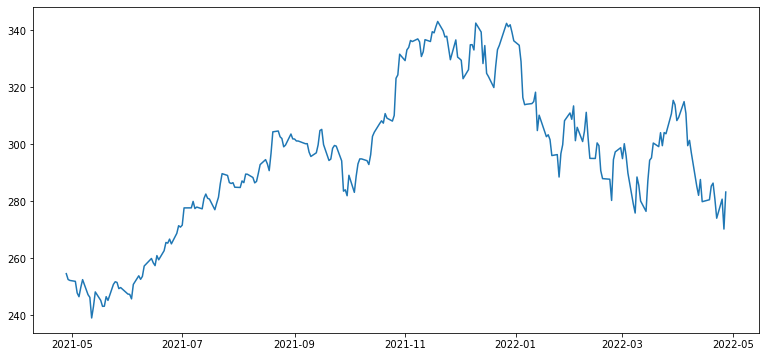

In [40]:
# matlab 차트의 기본 크기를 13, 6으로 지정
rcParams['figure.figsize'] = 13, 6 

# 시계열(time series) 데이터 차트로 확인하기
plt.plot(ts)

<div style = "height: 50px;"></div>

# STEP 2 : 각종 전처리 수행

## (1) 결측치 처리
<hr/>

### 결측치 확인하기

In [41]:
ts[ts.isna()]

Series([], Name: Close, dtype: float64)

In [42]:
ts.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 253 entries, 2021-04-28 to 2022-04-27
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
253 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


In [43]:
ts.isnull().sum()

0

<div style = "height: 15px;"></div>

## (2) 로그변환
<hr/>

In [44]:
ts_log = np.log(ts)

In [45]:
# 로그 변환 전 Augmented Dickey-Fuller Test 수행
augmented_dickey_fuller_test(ts)

Results of Dickey-Fuller Test:
Test Statistic                  -1.807437
p-value                          0.376776
#Lags Used                       0.000000
Number of Observations Used    252.000000
Critical Value (1%)             -3.456569
Critical Value (5%)             -2.873079
Critical Value (10%)            -2.572919
dtype: float64


In [46]:
# 로그 변환 후 Augmented Dickey-Fuller Test 수행
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.821097
p-value                          0.370039
#Lags Used                       0.000000
Number of Observations Used    252.000000
Critical Value (1%)             -3.456569
Critical Value (5%)             -2.873079
Critical Value (10%)            -2.572919
dtype: float64


로그함수로 변환하니 p-value가 약 0.001 떨어진 것을 확인할 수 있었다.

<div style = "height: 50px;"></div>

# STEP 3 : 시계열 안정성 분석

## (1) 시계열 분해 (Time Series Decomposition)기법 적용하기
<hr/>

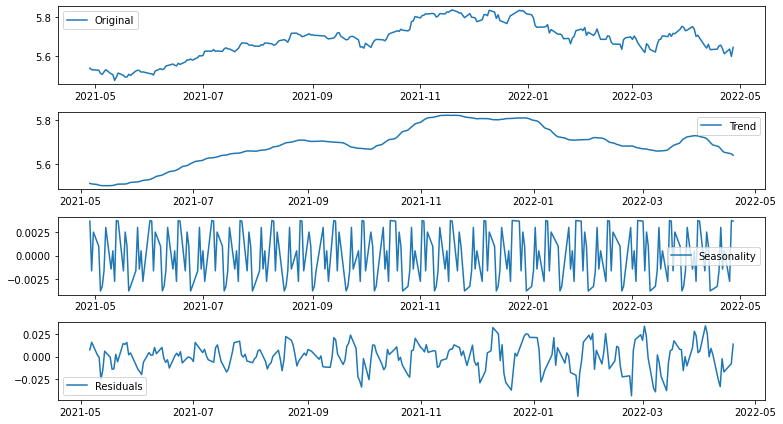

In [47]:
decomposition = seasonal_decompose(ts_log, period = 12)

trend = decomposition.trend # 추세(시간 추이에 따라 나타나는 평균값 변화 )
seasonal = decomposition.seasonal # 계절성(패턴이 파악되지 않은 주기적 변화)
residual = decomposition.resid # 원본(로그변환한) - 추세 - 계절성
plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

<div style = "height: 15px;"></div>

## (2) Residual 안정성 확인
<hr/>

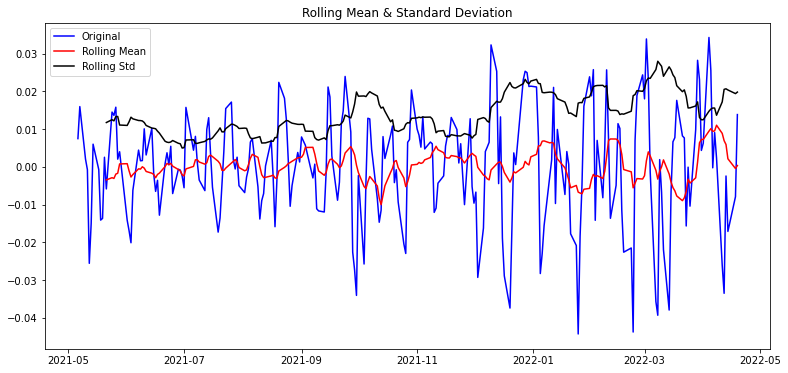

In [48]:
plt.rcParams["figure.figsize"] = (13, 6)
plot_rolling_statistics(residual)

In [49]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -8.446753e+00
p-value                        1.704633e-13
#Lags Used                     7.000000e+00
Number of Observations Used    2.330000e+02
Critical Value (1%)           -3.458731e+00
Critical Value (5%)           -2.874026e+00
Critical Value (10%)          -2.573424e+00
dtype: float64


seasonal_decompose 메서드를 통해 trend, seasonality를 분리해낸 결과, 0.370039였던 p-value가 1.704633e-13으로 크게 줄었다.<br/>
이정도면 충분히 안정적인 시계열이라고 할 수 있다.

<div style = "height: 50px;"></div>

## STEP 4 : 학습, 테스트 데이터셋 생성

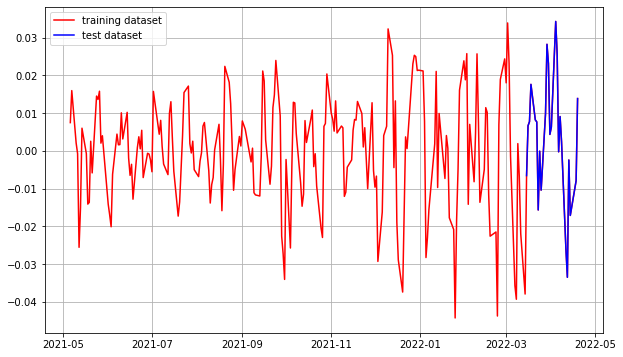

In [50]:
train_data, test_data = residual[:int(len(residual)*0.9)], residual[int(len(residual)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
# train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 residual을 선택
plt.plot(residual, c='r', label='training dataset')  
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

<div style = "height: 50px;"></div>

# STEP 5 : 적정 ARIMA 모수 찾기 

## (1) ACF, PACF 그려본 후 p, q값 구하기
<hr/>

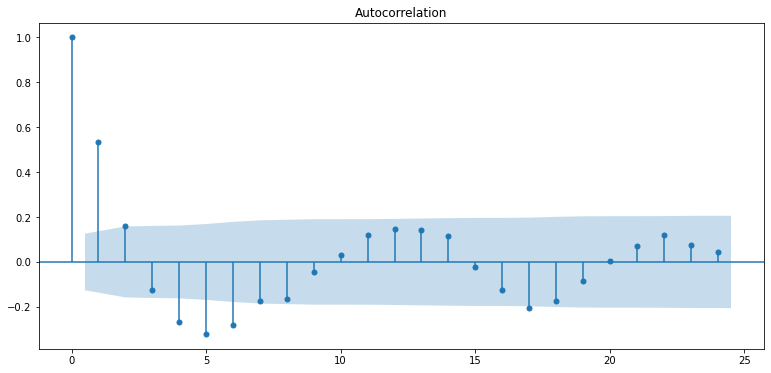

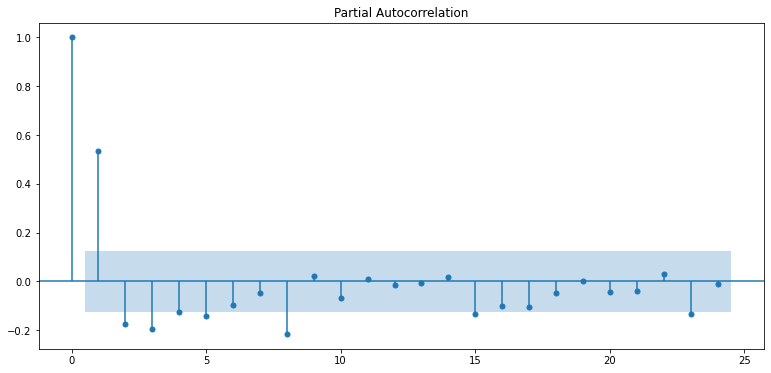

In [51]:
# ACF : Autocorrelation 그래프 그리기
plot_acf(residual)

# PACF : Partial Autocorrelation 그래프 그리기
plot_pacf(residual)  

plt.show()

ACF가 1까지는 0과 현저히 다른 값을 가지나, 그 이후에는 점차적으로 0을 향해 감소하고,<br/>
PACF도 1까지는 0과 현저히 다르고, 그 이후는 MA(q)처럼 점차적으로 소멸한다.

따라서, ARMA(p, q)모형을 나타내며, 이에 따라 p값과 q값은 1이라고 판단하였다.

<div style = "height: 15px;"></div>

## (2) 차분 안정성 확인 (d 구하기)
<hr/>

Results of Dickey-Fuller Test:
Test Statistic                -8.693078e+00
p-value                        3.991778e-14
#Lags Used                     1.200000e+01
Number of Observations Used    2.270000e+02
Critical Value (1%)           -3.459490e+00
Critical Value (5%)           -2.874358e+00
Critical Value (10%)          -2.573602e+00
dtype: float64


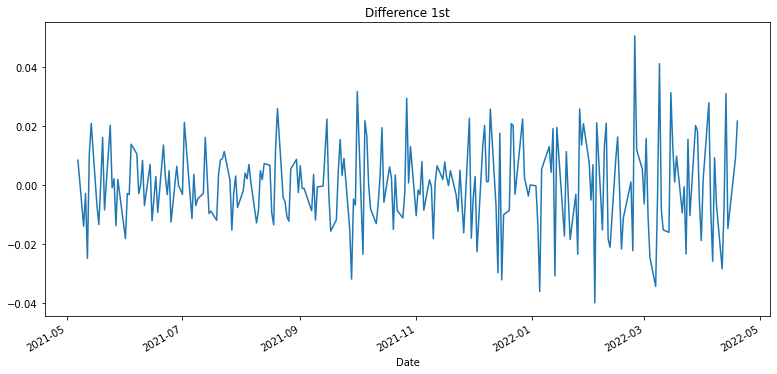

In [52]:
# 1차 차분 구하기
diff_1 = residual.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -9.699960e+00
p-value                        1.078814e-16
#Lags Used                     1.400000e+01
Number of Observations Used    2.240000e+02
Critical Value (1%)           -3.459885e+00
Critical Value (5%)           -2.874531e+00
Critical Value (10%)          -2.573694e+00
dtype: float64


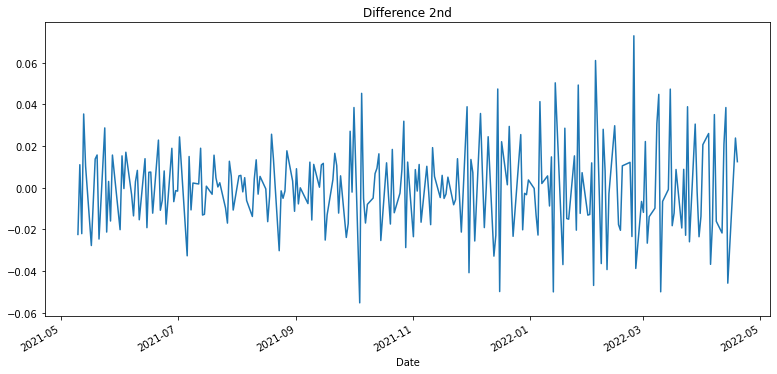

In [53]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

Results of Dickey-Fuller Test:
Test Statistic                -9.699960e+00
p-value                        1.078814e-16
#Lags Used                     1.400000e+01
Number of Observations Used    2.240000e+02
Critical Value (1%)           -3.459885e+00
Critical Value (5%)           -2.874531e+00
Critical Value (10%)          -2.573694e+00
dtype: float64


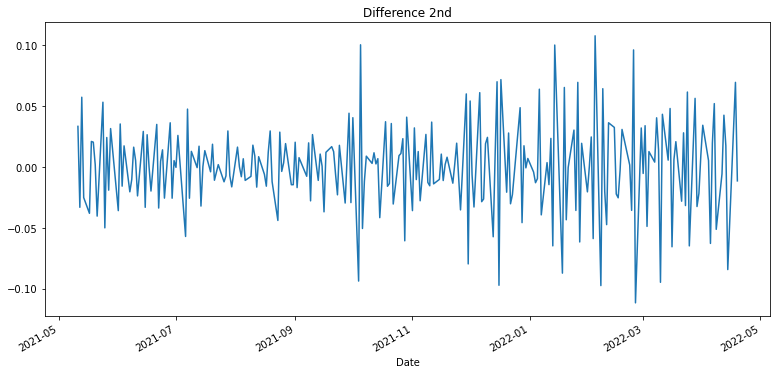

In [54]:
# 3차 차분 구하기
diff_3 = diff_2.diff(periods=1).iloc[1:]
diff_3.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

1차 차분을 했을 때 보다 2차 차분을 했을 때의 p값이 더 0에 가까우며, 3차 차분 이상을 했을 때 값이 변하지 않는 것을 확인했다. <br/>
때문에 차분은 2차 차분을 하기로 판단하였으며 b의 값은 2로 지정했다.

<div style = "height: 50px;"></div>

# STEP 6 : ARIMA 모델 훈련과 테스트

## (1) ARIMA 모델 빌드와 훈련
<hr/>

In [55]:
model = ARIMA(train_data, order=(1, 2, 1))  

In [56]:
fitted_m = model.fit() 

In [57]:
print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                  216
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 609.026
Date:                Fri, 29 Apr 2022   AIC                          -1212.051
Time:                        15:24:52   BIC                          -1201.954
Sample:                             0   HQIC                         -1207.971
                                - 216                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0868      0.069     -1.250      0.211      -0.223       0.049
ma.L1         -0.9998      2.760     -0.362      0.717      -6.410       4.411
sigma2         0.0002      0.001      0.359      0.7

<div style = "height: 15px;"></div>

## (2) ARIMA 모델의 훈련 결과를 시각화하기

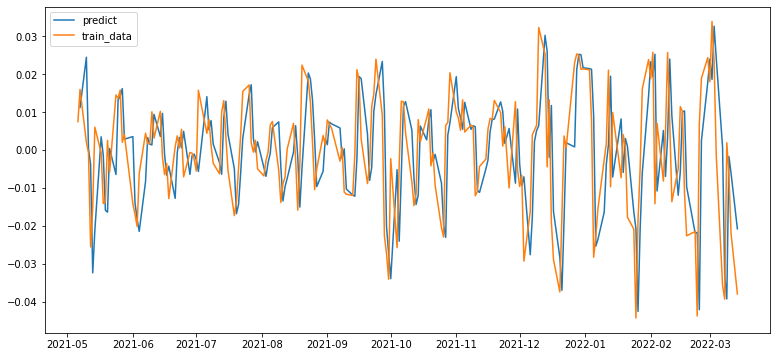

In [58]:
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])

plt.plot(fitted_m, label='predict')
plt.plot(train_data, label='train_data')
plt.legend()

<div style = "height: 15px;"></div>

## (3) forecast() 메소드를 이용해 테스트 데이터 구간의 데이터를 예측

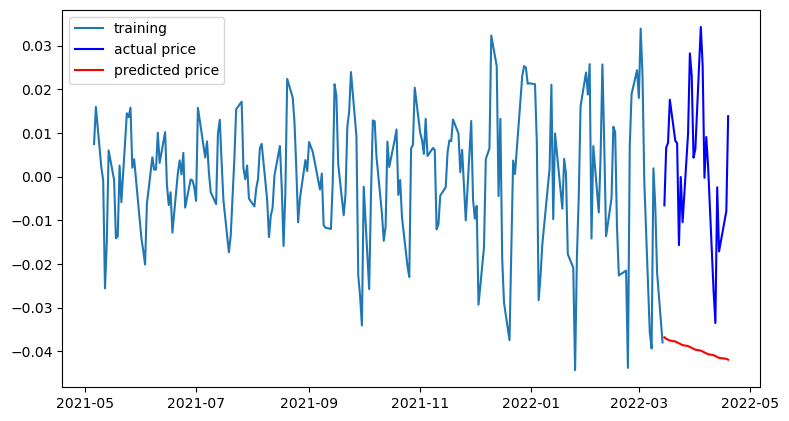

In [59]:
fitted_m = model.fit() 

# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

<div style = "height: 15px;"></div>

## (4) 최종 예측 모델 정확도 측정(MAPE)

In [60]:
mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))


MSE:  0.0020255444976100398
MAE:  0.04215506998186027
RMSE:  0.04500604956680868
MAPE: 4.18%


최종적인 예측 모델의 정확도(MAPE)는 4.18%로 높은 정확도를 보였다.

# 회고
<hr/>